In [3]:
!pip install install opencv-contrib-python

     |████████████████████████████████| 55.6 MB 20.3 MB/s eta 0:00:01
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pic-music/music_class.ipynb
/kaggle/input/monhan-pokemon-pic/spectrum/spectrum/84.jpg
/kaggle/input/monhan-pokemon-pic/spectrum/spectrum/33.jpg
/kaggle/input/monhan-pokemon-pic/spectrum/spectrum/298.jpg
/kaggle/input/monhan-pokemon-pic/spectrum/spectrum/120.jpg
/kaggle/input/monhan-pokemon-pic/spectrum/spectrum/181.jpg
/kaggle/input/monhan-pokemon-pic/spectrum/spectrum/11.jpg
/kaggle/input/monhan-pokemon-pic/spectrum/spectrum/277.jpg
/kaggle/input/monhan-pokemon-pic/spectrum/spectrum/244.jpg
/kaggle/input/monhan-pokemon-pic/spectrum/spectrum/217.jpg
/kaggle/input/monhan-pokemon-pic/spectrum/spectrum/242.jpg
/kaggle/input/monhan-pokemon-pic/spectrum/spectrum/180.jpg
/kaggle/input/monhan-pokemon-pic/spectrum/spectrum/70.jpg
/kaggle/input/monhan-pokemon-pic/spectrum/spectrum/237.jpg
/kaggle/input/monhan-pokemon-pic/spectrum/spectrum/312.jpg
/kaggle/input/monhan-pokemon-pic/spectrum/spectrum/109.jpg
/kaggle/input/monhan-pokemon-pic/spectrum/spectrum/196.jpg
/kaggle/input/monh

In [102]:
from keras.utils.np_utils import to_categorical
import cv2
import numpy as np

spe_dir = "../input/monhan-pokemon-pic/spectrum/spectrum/"
X_train=[]
y_train=[]

for i in range(339):
    img = cv2.imread(spe_dir + str(i) + ".jpg")
    b,g,r = cv2.split(img)
    img = cv2.merge([r,g,b])
    X_train.append(img)
    y_train.append(0)

In [103]:
spe_dir = "../input/monhan-pokemon-pic/spectrum_m/spectrum_m/"

for i in range(335):
    img = cv2.imread(spe_dir + str(i) + ".jpg")
    b,g,r = cv2.split(img)
    img = cv2.merge([r,g,b])
    X_train.append(img)
    y_train.append(1)

In [105]:
from sklearn.model_selection import train_test_split
X_train = np.array(X_train)
y_train = np.array(y_train)
y_train = y_train.T
y_train = to_categorical(y_train)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train,
                                                        test_size=0.3,
                                                        shuffle=True,
                                                        random_state=200,)


In [106]:
from keras.layers import Activation, Conv2D, Dense, Flatten, MaxPooling2D
from keras.models import Sequential, load_model
from keras.utils.np_utils import to_categorical
from keras import optimizers
from keras.layers import Dense, Dropout, Flatten, Input, BatchNormalization
from keras.models import Model, Sequential

model = Sequential()
model.add(Conv2D(input_shape=(576, 576, 3), filters=32,kernel_size=(2, 2), strides=(1, 1), padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(2, 2), strides=(1, 1), padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(2, 2), strides=(1, 1), padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

In [107]:
model.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=20) 

Epoch 1/20
15/15 [==============================] - 1s 99ms/step - loss: 0.3966 - accuracy: 0.8301
Epoch 2/20
15/15 [==============================] - 1s 97ms/step - loss: 0.1354 - accuracy: 0.9597
Epoch 3/20
15/15 [==============================] - 1s 97ms/step - loss: 0.0752 - accuracy: 0.9766
Epoch 4/20
15/15 [==============================] - 1s 96ms/step - loss: 0.0534 - accuracy: 0.9851
Epoch 5/20
15/15 [==============================] - 1s 97ms/step - loss: 0.0546 - accuracy: 0.9745
Epoch 6/20
15/15 [==============================] - 1s 95ms/step - loss: 0.0406 - accuracy: 0.9936
Epoch 7/20
15/15 [==============================] - 1s 96ms/step - loss: 0.0165 - accuracy: 1.0000 1s - loss:
Epoch 8/20
15/15 [==============================] - 1s 94ms/step - loss: 0.0260 - accuracy: 0.9958
Epoch 9/20
15/15 [==============================] - 1s 94ms/step - loss: 0.0119 - accuracy: 0.9958
Epoch 10/20
15/15 [==============================] - 1s 96ms/step - loss: 0.0107 - accuracy: 0.997

In [108]:
score = model.evaluate(X_test, y_test, verbose=1)
print()
print("Test loss:", score[0])
print("Test accuracy:", score[1])

7/7 [==============================] - 0s 34ms/step - loss: 0.5297 - accuracy: 0.8030

Test loss: 0.5296646356582642
Test accuracy: 0.802955687046051


Text(91.68, 0.5, 'true value')

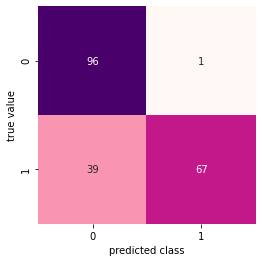

In [109]:
y_pred = model.predict(X_test)
# y_pred = np.argmax(y_pred, axis=1)
# y_pred = np.where(y_pred > 0.5, 1, 0)

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
sns.heatmap(cm,square=True,annot=True,cbar=False,fmt='d',cmap='RdPu')
plt.xlabel('predicted class')
plt.ylabel('true value')
# print('confusion matrix = \n', confusion_matrix(y_true=y_test, y_pred=y_pred))
# confusion_matrix(y_true, y_pred)

In [93]:
y_test

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.